In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
import utils
import metrics_utils
import metrics_utils_mod
import sys
sys.path.insert(0, '../src/')

import sparsity_mnist
matplotlib.rcParams.update({'font.size': 15})
is_save = True
figsize = metrics_utils.get_figsize(is_save)

/home/marche/anaconda3/envs/py2/lib/python2.7/site-packages/ot/lp/__init__.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .emd_wrap import emd_c, check_result


toolz.functoolz
toolz
cytoolz.dicttoolz
cytoolz.recipes
cytoolz.functoolz
cytoolz.itertoolz
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed


MNIST: representation error of pure sparsity, wavelet and variational autoencoder (separately and jointly trained) based admissibility sets. For the TV norm, two error terms connected to the representation are shown, which is used in some recovery results as part of the upper bound.

/media/marche/D2B625A2B62587D5/csgm/src
could not load z_dim.npy
/media/marche/D2B625A2B62587D5/csgm/src
could not load z_dim.npy


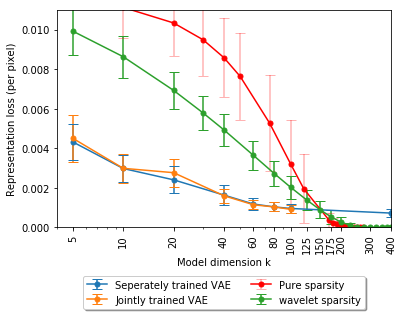

In [10]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('Seperately trained VAE' , '../Representation_error/MNIST/Separately/10000/vaeflex',    '/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10_0.01non-squared_1_previous-and-random_2_1'),
    ('Jointly trained VAE' , '../Representation_error/MNIST/Vaeflex/10000/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10_0.01non-squared_1_previous-and-random_2_1_',    ''),
 
    #    ('Seperately trained VAE' , '../Representation_error/MNIST/FOR_VAE/784/vae',    '/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10'),
#    ('Jointly trained VAE' , '../Representation_error/MNIST/Vaeflex/10000/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10_0.01non-squared_1_previous-and-random_2_1_',    ''),
#    ('From VAE flex' , '../Representation_error/Separately/10000/vaeflex',  '/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10_0.01non-squared_1_previous-and-random_2_1_*'),
    #('From VAE flex' , '../estimated/mnist/full-input/project/0.0/784/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_1_previous-and-random_',    ''),    
    
    #    ('From generator' , '../estimated/archive/mnist_original/gen-span/gaussian/0.1/',    '/vae/0.0_1.0_0.1_adam_0.1_0.9_False_1000_10'),
#    ('From generator far' , '../estimated/archive/mnist_far/gen-span/gaussian/0.1/' ,    '/vae/0.0_1.0_0.1_adam_0.1_0.9_False_1000_10'),
#    ('From generator close' , '../estimated/archive/mnist_close/gen-span/gaussian/0.1/', '/vae/0.0_1.0_0.1_adam_0.1_0.9_False_1000_10'),

]
save_path = '../results/MNIST_REPRESENTATION_ERROR_L1_real_L2.pdf'


plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list,indices = [5, 10, 20, 40, 60, 80, 100, 125, 150, 175, 200, 300,400],distr='nonsquared')
    legends.append(legend)
    
_,_, _, _, _,rep_err,rep_err_std,metr,_,_ = sparsity_mnist.chkpoint('../Representation_error/MNIST/pure_sparsity/mnistl2',301)
mean,std=sparsity_mnist.gain_mean_std(metr,max_it='metr_dim',mode='eucl_pix')
sparsity_mnist.plot_errorbar('../Representation_error/MNIST/pure_sparsity/', mean,std, False,'',0,ecolor=(1,0,0,.3),color=(1,0,0,1),indices=[10,20,30,40,50,75,100,120,170,180,190,200,210,220,230,240,250,260,270])
legends.append('Pure sparsity')
_,_, _, rep_err, rep_err_std, _ ,_,metr,_,_= sparsity_mnist.chkpoint('../Representation_error/MNIST/pure_sparsity/mnistWav_l2',644)
mean,std=sparsity_mnist.gain_mean_std(metr,max_it='metr_dim',mode='eucl_pix')
sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/wav_', mean,std, False,'',0,ecolor='tab:green',color='tab:green',indices=[5,10,20,30,40,60,80,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525])
legends.append('wavelet sparsity')

#----------------------------------COMMENT OUT FOR TV NORM EXPERIMENTS-----------------------------------------

#_,_, _, rep_err, rep_err_std, _ ,_,metr,_,_= sparsity_mnist.chkpoint('../Representation_error/MNIST/pure_sparsity/mnistTV_l2',644)
#mean,std=sparsity_mnist.gain_mean_std(metr,max_it='metr_dim',mode='eucl_pix')
#sparsity_mnist.plot_errorbar('../Representation_error/MNIST/pure_sparsity/TV_',mean,std, False,'',0,ecolor=(0.5,0.5,0.5,0.3),color=(0.5,0.5,0.5,0.3),indices=[5,10,20,30,40,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400])
#legends.append('TV sparsity')

#_,_, _, rep_err, rep_err_std, _ ,_,metr,_,_,_= sparsity_mnist.chkpoint('../Representation_error/MNIST/pure_sparsity/mnistTV_l12_mix',644)
#import numpy as np
#metr=metr/(np.sqrt(1+np.asarray(range(784))))[:,np.newaxis]
##metr=metr/(1+np.asarray(range(784)))[:,np.newaxis]
#mean,std=sparsity_mnist.gain_mean_std(metr,max_it='metr_dim',mode='pix')
#sparsity_mnist.plot_errorbar('../Representation_error/MNIST/pure_sparsity/TV_l12_mix', mean,std, False,'',0,ecolor=(0.5,0.5,0.5,0.5),color=(0.5,0.5,0.5,0.5),indices=[10,50,100,150,200,250,300,400])
#legends.append('TV sparsity l12 mix')



## Prettify

# axis
#plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.0002])
plt.gca().set_ylim(top=0.011)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([4, 400])

# labels, ticks, titles
ticks = [5, 10, 20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400]#400, 500, 784]
labels = [5, 10, 20, 40, 60, 80, 100, 125, 150, 175, 200, 300,  400]#400, 500, 784]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Representation loss (per pixel)')
plt.xlabel('Model dimension k')

# Legend
#plt.legend(legends,loc='upper center', bbox_to_anchor=(1., -.2), ncol=3, fancybox=True, shadow=True)
plt.legend(legends,loc='upper center', bbox_to_anchor=(.5, -.2), ncol=2, fancybox=True, shadow=True)

# Saving
utils.save_plot(is_save, save_path)

Fashion MNIST: representation error of pure sparsity, wavelet and variational autoencoder (separately and jointly trained) based admissibility sets. For the TV norm, two error terms connected to the representation are shown, which is used in some recovery results as part of the upper bound.

/media/marche/D2B625A2B62587D5/csgm/src
could not load z_dim.npy
/media/marche/D2B625A2B62587D5/csgm/src
could not load z_dim.npy


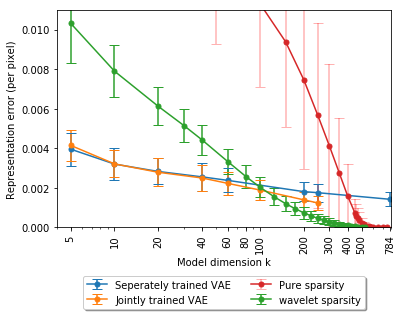

In [9]:
## Define what to plot
criterion_list = [['l2_losses', 'mean']]
retrieve_list_list = [[['l2_losses', 'mean'], ['l2_losses', 'std']]]
labels_metric = ['l2']
legend_base_regexs = [
    #('Seperately trained VAE' , '../Representation_error/Fashion/VAE/VAEflex',    '/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01non-squared_1_previous-and-random_1_1'),
    #('Jointly trained VAE' , '../Representation_error/Fashion/Vaeflex/VAEflex5-10-20-40-60-100-200-250/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01non-squared_1_previous-and-random_1_1_',    ''),
    ('Seperately trained VAE' , '../Representation_error/Fashion/VAEFIX/VAEflex',    '/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10_0.01non-squared_1_previous-and-random_1_1'),
    ('Jointly trained VAE' , '../Representation_error/Fashion/VAEFLEX/VAEflex5-10-20-40-60-100-200-250/0.0_1.0_0.0_adam_0.1_0.9_False_10000_10_0.01non-squared_1_previous-and-random_1_1_',    ''),

]
save_path = '../results/FASHION_REPRESENTATION_ERROR_L1.pdf'

for i in range(len(criterion_list)):
    criterion = criterion_list[i]
    retrieve_list = retrieve_list_list[i]
    plt.figure(figsize=figsize)
    legends = []
    for legend, base, regex in legend_base_regexs:
        metrics_utils_mod.plot(base, regex, criterion, retrieve_list,indices = [5, 10, 20, 40, 60, 80, 100, 200,250, 784],distr='nonsquared')
        legends.append(legend)

    _, _, _,_,_,rep_err, rep_err_std,metr,_,_ = sparsity_mnist.chkpoint('../Representation_error/Fashion/pure_sparsity/fashion-mnistl2',751)
    mean,std=sparsity_mnist.gain_mean_std(metr,max_it='metr_dim',mode='eucl_pix')
    sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/l2', mean,std, False,'',0,ecolor=(1,0,0,.3),color='tab:red',indices=[50,100,150,200,250,300,350,400,450,460,470,480,500,520,540,560,580,600,650,700,750]) 
    legends.append('Pure sparsity')
    _, _, _,_,_,_, _,metr,_,_ = sparsity_mnist.chkpoint('../Representation_error/Fashion/pure_sparsity/fashion-mnistWav_l2',644)
    mean,std=sparsity_mnist.gain_mean_std(metr,max_it='metr_dim',mode='eucl_pix')
    sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/wav_', mean,std, False,'',0,ecolor='tab:green',color='tab:green',indices=[5,10,20,30,40,60,80,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525])  
    #sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/wav_', mean*0.7,std, False,'',0,ecolor=(0,0.545,0,0.001),color=(0,0.545,0,0.5),indices=[5,10,20,30,40,60,80,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525])
    legends.append('wavelet sparsity')
    
    #-------------------------------COMMENT OUT FOR TV NORM EXPERIMENTS-----------------------------------------
    
#    _,_, _, rep_err, rep_err_std, _ ,_,metr,_,_= sparsity_mnist.chkpoint('../Representation_error/Fashion/pure_sparsity/fashion-mnistTV_l1',644)
#    import numpy as np
#    metr=metr/(np.sqrt(1+np.asarray(range(784))))[:,np.newaxis]
#    mean,std=sparsity_mnist.gain_mean_std(metr,max_it=784,mode='pix',img_dim=784)#division not by gradient dimension, but by image dimension    
##    sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/TV_l1', mean,std, False,'',0,ecolor=(0.5,0.5,0.5,0.5),color=(0.5,0.5,0.5,0.5),indices=[5,10,15,20,40,60,80,100,200,225,250,275,300,325,350,375,400,425,450,475,500,525,550,600,650,700,750,783])
#    sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/TV_l1', mean,std, False,'',0,ecolor=(0.5,0.5,0.5,0.5),color=(0.5,0.5,0.5,0.5),indices=[5,10,15,20,40,60,80,100,150,200,250,300,350,400,500,600,700,783])
#    legends.append('TV sparsity l1')
    
#    _, _, _,_,_,err,errst,metr,_,_ = sparsity_mnist.chkpoint('../Representation_error/Fashion/pure_sparsity/fashion-mnistTV_l2',644)
#    mean,std=sparsity_mnist.gain_mean_std(metr,max_it=784,mode='eucl_pix',img_dim=784)
#    sparsity_mnist.plot_errorbar('../Representation_error/Fashion/pure_sparsity/TV_l2', mean,std, False,'',0,ecolor=(0.5,0.5,0.5,0.3),color=(0.5,0.5,0.5,0.3),indices=[5,10,15,20,40,60,80,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525,550,600,650,750,783])
#    legends.append('TV sparsity')


    ## Prettify

    # axis
    #plt.gca().set_ylim(bottom=0)
    plt.gca().set_ylim([0,0.011])
   # plt.gca().set_ylim(top=0.02)
    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([4, 800])

    # labels, ticks, titles
    ticks = [5, 10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 784]
    labels = [5, 10, 20, 40, 60, 80, 100, 200, 300,  400, 500, 784]
    #ticks = [5, 60, 100, 200, 300, 400, 500, 600,700,784]
    #labels = [5, 60, 100, 200, 300,  400, 500, 600,700,784]
    plt.xticks(ticks, labels, rotation=90)
    plt.ylabel('Representation error (per pixel)')# in {} metric'.format(labels_metric[i]))
    plt.xlabel('Model dimension k')
    #plt.gca().tick_params(axis='y',labelleft='off')

    # Legend
   # plt.legend(legends,loc='upper center', bbox_to_anchor=(.5, -.2), ncol=3, fancybox=True, shadow=True)
    plt.legend(legends,loc='upper center', bbox_to_anchor=(.5, -.2), ncol=2, fancybox=True, shadow=True)

    # Saving
    utils.save_plot(is_save, save_path)